# 📊 Feature Scaling: Making Data Comparable

## 🧠 What is Feature Scaling?

**Feature Scaling** is a technique used in machine learning to normalize the range of independent variables or features of data. It ensures that each feature contributes equally to the result, especially important for algorithms that compute distances between data points.

For example, consider a dataset with the following features:

- **Age**: Ranges from 18 to 100
- **Income**: Ranges from ₹25,000 to ₹75,000

Without scaling, the income feature could dominate the analysis due to its larger numerical range. Feature scaling addresses this by transforming features to a common scale, enabling fair comparison between different features.

## ⚙️ Why is Feature Scaling Important?

Many machine learning algorithms, such as K-Nearest Neighbors (KNN) and Support Vector Machines (SVM), rely on distance calculations. If one feature has a broad range of values, it can disproportionately influence the model's performance. Feature scaling ensures that each feature contributes equally to the result.

## 🔧 Common Feature Scaling Techniques

### 1. Normalization (Min-Max Scaling)

- **Purpose**: Rescales features to a fixed range, typically [0, 1].
- **Formula**:
  $
  x' = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}
  $
- **Use Case**: Useful when the distribution of data is not Gaussian.

### 2. Standardization (Z-score Normalization)

- **Purpose**: Centers the data around the mean with a unit standard deviation.
- **Formula**:
  $
  x' = \frac{x - \mu}{\sigma}
  $
  Where $( \mu $) is the mean and $( \sigma $) is the standard deviation.
- **Use Case**: Preferred when the data follows a Gaussian distribution.

## 🧪 Example: Feature Scaling in Python

Let's demonstrate both normalization and standardization using Python:

```python
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Sample data
data = pd.DataFrame({
    'Age': [25, 30, 45, 50],
    'Income': [50000, 60000, 80000, 90000]
})

# Normalization
min_max_scaler = MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(data)
normalized_df = pd.DataFrame(normalized_data, columns=['Age', 'Income'])

# Standardization
standard_scaler = StandardScaler()
standardized_data = standard_scaler.fit_transform(data)
standardized_df = pd.DataFrame(standardized_data, columns=['Age', 'Income'])

print("Normalized Data:\n", normalized_df)
print("\nStandardized Data:\n", standardized_df)


# 1: Standardization Feature Scaling

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# reading the data
dataset = pd.read_csv("SuperStoreUS.csv", encoding='latin1')
dataset.head(3)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,1/7/2015,1/8/2015,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,6/13/2015,6/15/2015,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,2/15/2015,2/17/2015,-53.8096,22,211.15,90192


In [7]:
# checking the null values
dataset.isnull().sum()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                1952 non-null   int64  
 1   Order Priority        1952 non-null   object 
 2   Discount              1952 non-null   float64
 3   Unit Price            1952 non-null   float64
 4   Shipping Cost         1952 non-null   float64
 5   Customer ID           1952 non-null   int64  
 6   Customer Name         1952 non-null   object 
 7   Ship Mode             1952 non-null   object 
 8   Customer Segment      1952 non-null   object 
 9   Product Category      1952 non-null   object 
 10  Product Sub-Category  1952 non-null   object 
 11  Product Container     1952 non-null   object 
 12  Product Name          1952 non-null   object 
 13  Product Base Margin   1936 non-null   float64
 14  Country               1952 non-null   object 
 15  Region               

In [10]:
# filling null
dataset["Product Base Margin"].fillna(dataset["Product Base Margin"].mode()[0], inplace=True)
dataset.isnull().sum()

C:\Users\Jeetendra\AppData\Local\Temp\ipykernel_13404\2113044831.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Product Base Margin"].fillna(dataset["Product Base Margin"].mode()[0], inplace=True)


Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Country                 0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [14]:
# describe the dataset
dataset.describe()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Profit,Quantity ordered new,Sales,Order ID
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,19916.479508,0.048975,109.079221,12.968151,1735.376537,0.513996,51534.769467,114.793859,12.944672,985.828832,82365.924180
std,5957.595627,0.031378,393.481301,17.414631,991.078006,0.137118,29362.828420,1141.112387,13.871565,2559.900167,19042.295798
min,64.000000,0.000000,1.140000,0.490000,3.000000,0.350000,1001.000000,-16476.838000,1.000000,2.250000,359.000000
25%,19121.000000,0.020000,6.480000,3.230000,875.000000,0.380000,28560.000000,-84.485400,5.000000,58.807500,86767.750000
50%,21164.500000,0.050000,20.990000,6.150000,1738.000000,0.520000,48765.500000,1.476450,10.000000,202.395000,88376.000000
75%,23483.250000,0.080000,100.972500,14.362500,2578.250000,0.590000,78550.000000,116.201575,16.000000,802.945000,89957.000000
max,26389.000000,0.210000,6783.020000,164.730000,3403.000000,0.850000,99362.000000,9228.225600,167.000000,45737.330000,91586.000000


C:\Users\Jeetendra\AppData\Local\Temp\ipykernel_13404\2798290415.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Unit Price"])


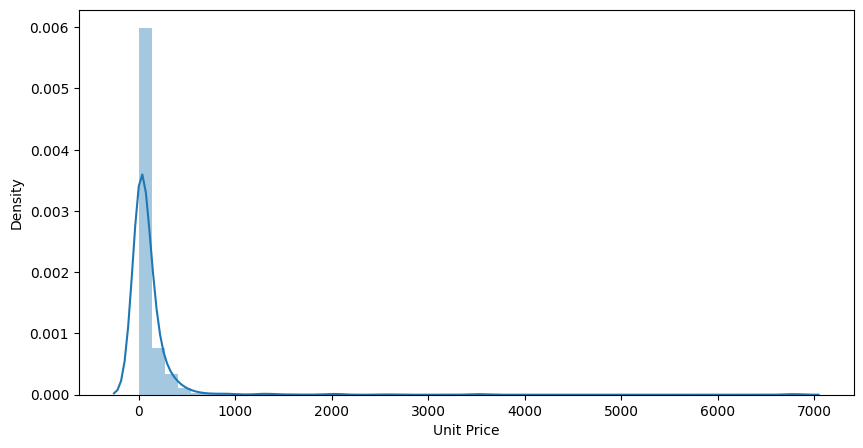

In [12]:
#now checking the graph using distplot

plt.figure(figsize=(10,5))
sns.distplot(dataset["Unit Price"])
plt.show()

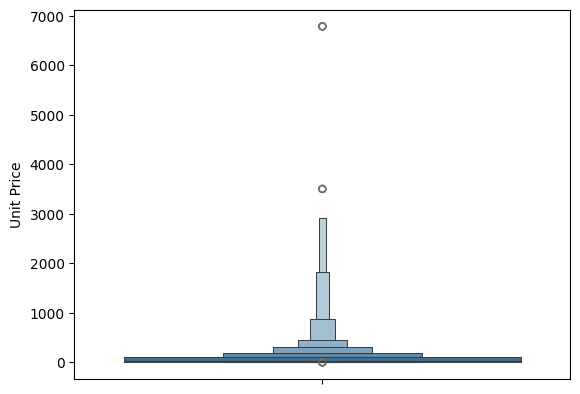

In [13]:
# using boxplot to show the outliers
plt.Figure(figsize=(10,5))
sns.boxenplot(dataset["Unit Price"])
plt.show()

In [15]:
# now using scaling using sklearn
from sklearn.preprocessing import StandardScaler

In [17]:
ss = StandardScaler()
dataset["ss"] = ss.fit_transform(dataset[["Unit Price"]])
dataset.head(3)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,ss
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,1/7/2015,1/8/2015,4.5600,4,13.01,88522,-0.270067
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,California,San Gabriel,91776,6/13/2015,6/15/2015,4390.3665,12,6362.85,90193,0.996238
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,New Jersey,Roselle,7203,2/15/2015,2/17/2015,-53.8096,22,211.15,90192,-0.253188


In [18]:
dataset.describe()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Profit,Quantity ordered new,Sales,Order ID,ss
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1.952000e+03
mean,19916.479508,0.048975,109.079221,12.968151,1735.376537,0.513996,51534.769467,114.793859,12.944672,985.828832,82365.924180,8.190170e-18
std,5957.595627,0.031378,393.481301,17.414631,991.078006,0.137118,29362.828420,1141.112387,13.871565,2559.900167,19042.295798,1.000256e+00
min,64.000000,0.000000,1.140000,0.490000,3.000000,0.350000,1001.000000,-16476.838000,1.000000,2.250000,359.000000,-2.743888e-01
25%,19121.000000,0.020000,6.480000,3.230000,875.000000,0.380000,28560.000000,-84.485400,5.000000,58.807500,86767.750000,-2.608142e-01
50%,21164.500000,0.050000,20.990000,6.150000,1738.000000,0.520000,48765.500000,1.476450,10.000000,202.395000,88376.000000,-2.239288e-01
75%,23483.250000,0.080000,100.972500,14.362500,2578.250000,0.590000,78550.000000,116.201575,16.000000,802.945000,89957.000000,-2.060784e-02
max,26389.000000,0.210000,6783.020000,164.730000,3403.000000,0.850000,99362.000000,9228.225600,167.000000,45737.330000,91586.000000,1.696561e+01


C:\Users\Jeetendra\AppData\Local\Temp\ipykernel_13404\3297439553.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Unit Price"])
C:\Users\Jeetendra\AppData\Local\Temp\ipykernel_13404\3297439553.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ss"])


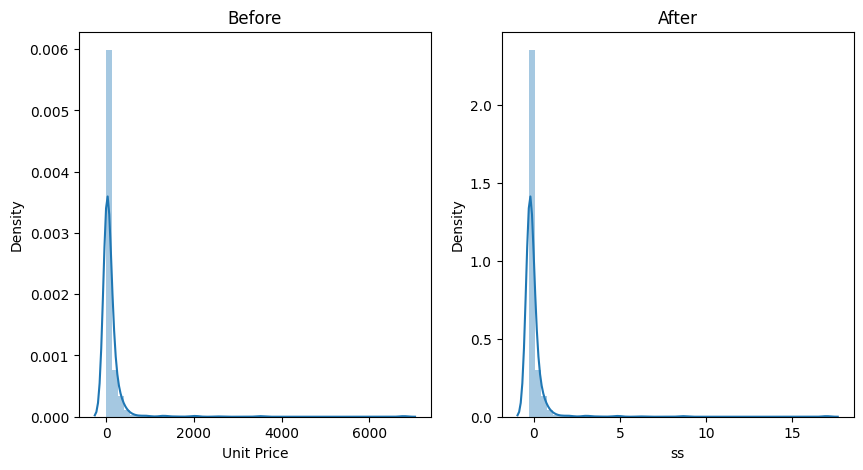

In [22]:
# check the nature of the data using distplot of ss, look the before and after graph
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["Unit Price"])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["ss"])

plt.show()

This mean that scaling does not change the nature of the data just change the magnitude.

# 2: Normalization Feature Scaling (using Min-Max scalling)

In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Sample data
data = pd.DataFrame({
    'Age': [25, 30, 45, 50],
    'Income': [50000, 60000, 80000, 90000]
})

# Normalization
min_max_scaler = MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(data)
normalized_df = pd.DataFrame(normalized_data, columns=['Age', 'Income'])

# Standardization
standard_scaler = StandardScaler()
standardized_data = standard_scaler.fit_transform(data)
standardized_df = pd.DataFrame(standardized_data, columns=['Age', 'Income'])

print("Normalized Data:\n", normalized_df)
print("\nStandardized Data:\n", standardized_df)

Normalized Data:
    Age  Income
0  0.0    0.00
1  0.2    0.25
2  0.8    0.75
3  1.0    1.00

Standardized Data:
         Age    Income
0 -1.212678 -1.264911
1 -0.727607 -0.632456
2  0.727607  0.632456
3  1.212678  1.264911


In [26]:
# using manual

# Sample data
data = pd.DataFrame({
    'Age': [25, 30, 45, 50],
    'Income': [50000, 60000, 80000, 90000]
})

data['Age_normal'] = (data['Age'] - data["Age"].min())/(data["Age"].max() - data["Age"].min())
data['Income_normal'] = (data['Income'] - data["Income"].min())/(data["Income"].max() - data["Income"].min())
data

,Age,Income,Age_normal,Income_normal
0,25,50000,0.0,0.00
1,30,60000,0.2,0.25
2,45,80000,0.8,0.75
3,50,90000,1.0,1.00
